In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
# Reading dataset
data = pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
# Spliting target data
dataset = data.loc[:,['Age','Spending Score (1-100)']] # Selecionando todas as linhas das colunas Age e Spending Score
dataset.head()

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


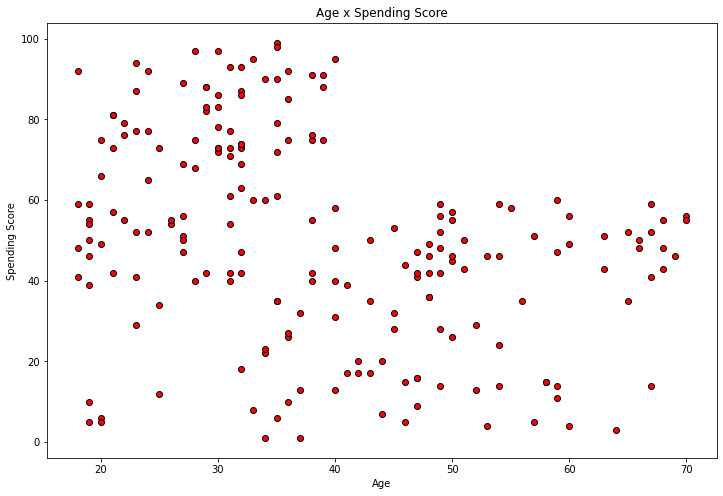

In [18]:
# Plotando pontos
plt.figure(figsize=(12,8))

plt.title("Age x Spending Score")
plt.scatter(x = dataset["Age"], y = dataset["Spending Score (1-100)"], color = "red", edgecolors = "black") # Pontos dispersos

plt.xlabel("Age")
plt.ylabel("Spending Score")

plt.show()

In [16]:
# Defining K value
dataset_ = np.array(dataset)

distortions = []
for i in range(1, 31):
    km = KMeans(n_clusters=i)
    km.fit(dataset_)
    distortions.append(km.inertia_)

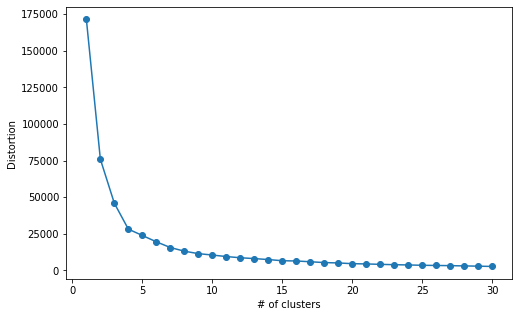

In [17]:
# Plotting K - Elbow Method

plt.figure(figsize=(8,5))

plt.plot(np.arange(1,31), distortions, marker = 'o')
plt.xlabel("# of clusters")
plt.ylabel("Distortion")

plt.show()

In [39]:
# Creating a cluster model with 8 clusters and training it
clusters = KMeans(n_clusters = 8).fit(dataset_).labels_

In [40]:
# Grouping the results in one DataFrame
dataset['Cluster'] = clusters
dataset.head()

,Age,Spending Score (1-100),Cluster
0,19,39,3
1,21,81,1
2,20,6,5
3,23,77,1
4,31,40,3


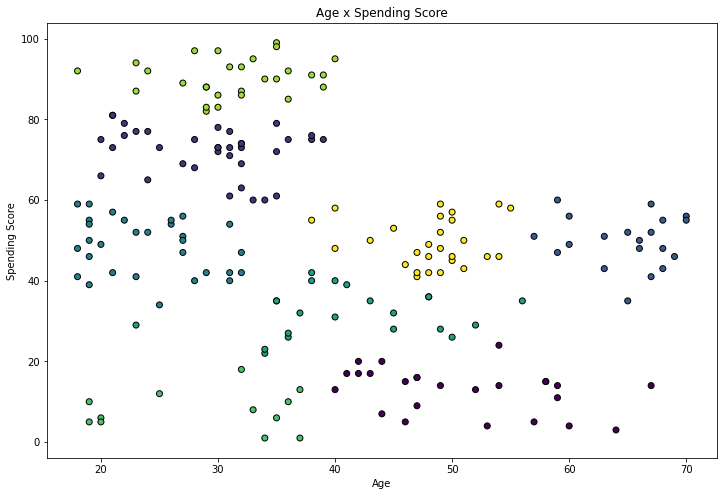

In [41]:
# Plotando pontos
plt.figure(figsize=(12,8))

plt.title("Age x Spending Score")
plt.scatter(x = dataset["Age"], y = dataset["Spending Score (1-100)"], c = dataset["Cluster"], edgecolors = "black") # Pontos dispersos

plt.xlabel("Age")
plt.ylabel("Spending Score")

plt.show()

In [42]:
# Avaliando métricas
from sklearn.metrics import calinski_harabasz_score, silhouette_score
print('Calinski-Harabasz score: %.2f' % calinski_harabasz_score(dataset_, clusters))
print('Silhouette score: %.2f' % silhouette_score(dataset_, clusters))

Calinski-Harabasz score: 334.56
Silhouette score: 0.43
